# Task 4- Exploration of Decision Tree Classification ALgorithm
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# The Decision tree algorithm
1.Find the best attribute and place it on the root node of the tree.

2.Now, split the training set of the dataset into subsets. While making the subset make sure that each subset of training dataset should have the same value for an attribute.

3.Find leaf nodes in all branches by repeating 1 and 2 on each subse

# Importing All the important Libraries

In [1]:
import pandas as pd
import numpy as np

# Loading the dataset

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Quality check of dataset

In [3]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Preprocessing The Dataset
The Decision Tree Classifier needs numerical Data only, It can't be useful against Categorical Data. So for Decision Tree, we have to convert or Encode the Categorical Values into Numerical Values.

In [6]:
from sklearn.preprocessing import LabelEncoder
species_label = LabelEncoder()

# Splitting of Data
We are going to split the dataset into 2 sections: 1.Input::-> This is the section which helps in the major training of the Decision Tree Classifier. HERE, input is NAMED as X. 2.Target::-> This is the section according to which the decision tree is needed to be build. HERE, target is NAMED as Y

In [7]:
X = iris.drop(['Species','Id'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y = iris.drop(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Id'],axis=1)
Y['Species Label'] = species_label.fit_transform(Y['Species'])
Y = Y.drop(['Species'], axis=1)
Y.head()

,Species Label
0,0
1,0
2,0
3,0
4,0


# Importing Decision Tree Algorithm from the tree Module of sklearn Library

In [9]:
from sklearn import tree
DecisionTree = tree.DecisionTreeClassifier()
DecisionTree.fit(X,Y)

DecisionTreeClassifier()

# Checking the score of the Decision Tree Classification
The Score tells how correct our Algorithm is on the dataset, the more near to 1 the more accurate the Machine Learning Algorithm is. Right Now, It is showing the SCORE as 1 because the we are using the entire dataset rather than splitting them in TEST and TRAIN.

In [10]:
DecisionTree.score(X,Y)


1.0

# Decision Tree Visualization

[Text(446.4, 747.4499999999999, 'Petal Length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(377.7230769230769, 611.55, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(515.0769230769231, 611.55, 'Petal Width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(274.7076923076923, 475.65, 'Petal Length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(137.35384615384615, 339.74999999999994, 'Petal Width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(68.67692307692307, 203.8499999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(206.03076923076924, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(412.0615384615385, 339.74999999999994, 'Petal Width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(

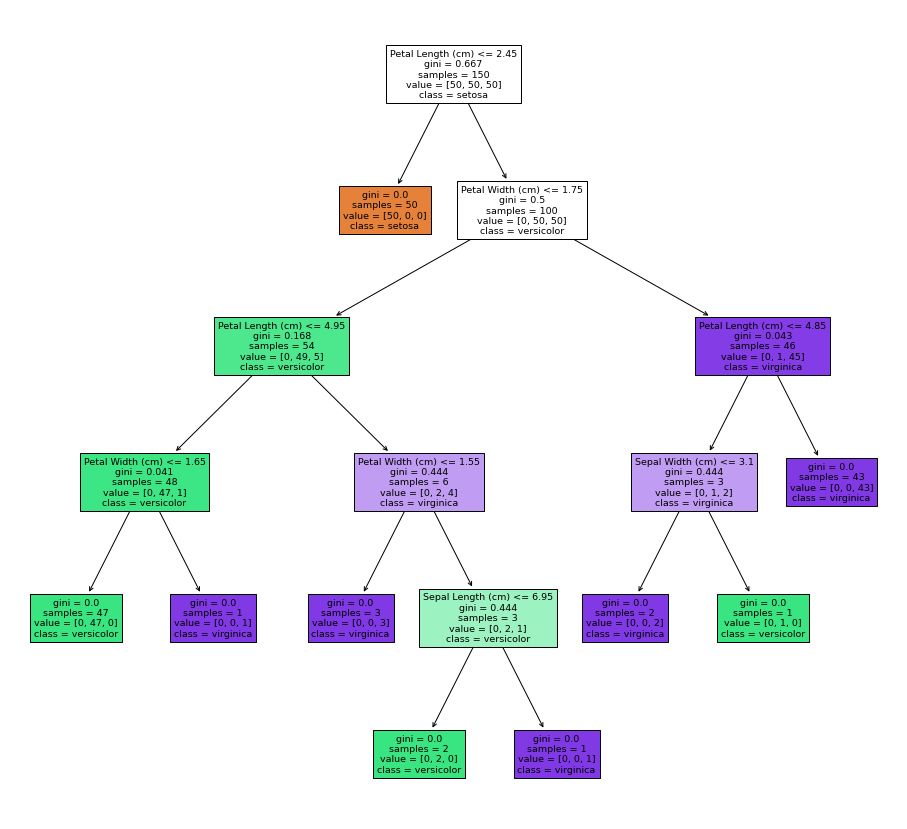

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,15))
Features_Name = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)']
Class_Name = ['setosa','versicolor','virginica']
tree.plot_tree(DecisionTree,feature_names = Features_Name,class_names=Class_Name,filled = True)